

# Assignment 4: Fine-Tuning do Segment Anything Model (SAM)  

**Introdução:**  
O Segment Anything Model (SAM) é um modelo de segmentação altamente versátil e poderoso, desenvolvido pela Meta AI. Ele foi projetado para lidar com uma ampla gama de tarefas, como segmentar objetos específicos, regiões ou até mesmo identificar múltiplos objetos em uma única imagem sem necessidade de treinamento adicional.  

O SAM utiliza uma abordagem baseada em *prompts*, permitindo que os usuários forneçam diferentes tipos de entrada, como pontos, caixas delimitadoras ou máscaras brutas, para guiar o modelo na segmentação desejada. Ele é composto por:  
- **Encoder de Imagem:** Extrai características visuais robustas.  
- **Encoder de Prompts:** Interpreta entradas do usuário.  
- **Mask Decoder:** Gera máscaras de segmentação com alta precisão.  

Apesar de ser altamente generalista, o SAM pode ser ajustado (fine-tuned) para melhorar seu desempenho em tarefas específicas. Este processo envolve utilizar dados especializados e adaptar o modelo às necessidades de aplicações como segmentação médica, agricultura, monitoramento ambiental, entre outras.  

**Objetivo:**  
Realizar o fine-tuning do SAM para uma tarefa de segmentação específica à sua escolha, demonstrando os passos e resultados por meio de uma apresentação de 10 minutos.  

**Instruções:**  

1. **Escolha da Tarefa:**  
   Selecione uma aplicação prática de segmentação para o fine-tuning do SAM, como:  
   - Segmentação de objetos em ambientes urbanos.  
   - Identificação de características em imagens médicas.  
   - Monitoramento de mudanças em imagens de satélite.  

2. **Preparação do Dataset:**  
   - Utilize ou construa um dataset relevante para sua tarefa.  
   - Divida os dados em treino, validação e teste.  
   - Aplique técnicas de *data augmentation* caso necessário.  

3. **Adaptação do SAM:**  
   - Use o SAM pré-treinado como base.  
   - Adapte sua arquitetura para atender aos requisitos da tarefa.  
   - Decida se congelará partes do modelo ou ajustará todas as camadas.  

4. **Treinamento:**  
   - Configure parâmetros como número de épocas, taxa de aprendizado e tamanho do batch.  
   - Utilize métricas adequadas (como IoU ou Dice Coefficient) para avaliar o desempenho do modelo ajustado.  

5. **Análise e Resultados:**  
   - Compare os resultados do modelo original (pré-treinado) com o modelo ajustado (fine-tuned).  
   - Destaque os desafios enfrentados e as soluções adotadas durante o fine-tuning.  

6. **Entrega:**  
   A entrega será feita por meio de um vídeo gravado de no máximo 10 minutos, contendo:  
   - Breve introdução ao SAM e à tarefa escolhida.  
   - Explicação sobre o dataset e adaptações feitas no modelo.  
   - Resultados e comparações entre o SAM original e o modelo ajustado.  
   - Conclusões e sugestões de melhorias ou aplicações futuras.  

**Dicas:**  
- Use a [documentação oficial do SAM](https://github.com/facebookresearch/segment-anything) como guia técnico.  
- Experimente congelar diferentes partes do modelo e observe como isso afeta o desempenho.  


## Convertendo os polígons em máscaras de segmentação 

In [56]:
import os
import cv2
import numpy as np

# pastas conjunto de validação
pasta_imagens = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/images"
pasta_labels = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/labels"
pasta_saida = "masks_train/"
os.makedirs(pasta_saida, exist_ok=True)

def carregar_poligono(caminho_txt):
    with open(caminho_txt, "r") as f:
        linha = f.readline().strip().split()
    # remove class_id
    coords = list(map(float, linha[1:]))
    # pares (x, y)
    pontos = [(coords[i], coords[i+1]) for i in range(0, len(coords), 2)]
    return pontos

for nome_txt in os.listdir(pasta_labels):
    if not nome_txt.endswith(".txt"):
        continue

    caminho_txt = os.path.join(pasta_labels, nome_txt)
    nome_base = nome_txt.replace(".txt", "")

    # imagem correspondente
    img_path = os.path.join(pasta_imagens, nome_base + ".jpg")
    if not os.path.exists(img_path):
        img_path = os.path.join(pasta_imagens, nome_base + ".png")
        if not os.path.exists(img_path):
            continue  # pula se não achar imagem

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # carregar polígono normalizado
    poligono_normalizado = carregar_poligono(caminho_txt)

    # converter para coordenadas da imagem
    poligono = []
    for x, y in poligono_normalizado:
        px = int(x * w)
        py = int(y * h)
        poligono.append([px, py])

    poligono = np.array([poligono], dtype=np.int32)

    # criar máscara vazia
    mask = np.zeros((h, w), dtype=np.uint8)

    # preencher o polígono
    cv2.fillPoly(mask, poligono, 255)

    # salvar
    out_path = os.path.join(pasta_saida, nome_base + "_mask.png")
    cv2.imwrite(out_path, mask)

# pastas conjunto de validação
pasta_imagens = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/images"
pasta_labels = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/labels"
pasta_saida = "masks_valid/"
os.makedirs(pasta_saida, exist_ok=True)

for nome_txt in os.listdir(pasta_labels):
    if not nome_txt.endswith(".txt"):
        continue

    caminho_txt = os.path.join(pasta_labels, nome_txt)
    nome_base = nome_txt.replace(".txt", "")

    # imagem correspondente
    img_path = os.path.join(pasta_imagens, nome_base + ".jpg")
    if not os.path.exists(img_path):
        img_path = os.path.join(pasta_imagens, nome_base + ".png")
        if not os.path.exists(img_path):
            continue  # pula se não achar imagem

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # carregar polígono normalizado
    poligono_normalizado = carregar_poligono(caminho_txt)

    # converter para coordenadas da imagem
    poligono = []
    for x, y in poligono_normalizado:
        px = int(x * w)
        py = int(y * h)
        poligono.append([px, py])

    poligono = np.array([poligono], dtype=np.int32)

    # criar máscara vazia
    mask = np.zeros((h, w), dtype=np.uint8)

    # preencher o polígono
    cv2.fillPoly(mask, poligono, 255)

    # salvar
    out_path = os.path.join(pasta_saida, nome_base + "_mask.png")
    cv2.imwrite(out_path, mask)


## Baixa o modelo pré treinado

In [57]:
CHECKPOINT_PATH = "/kaggle/working/sam_vit_h_4b8939.pth"

if not os.path.exists(CHECKPOINT_PATH):
    !wget -O /kaggle/working/sam_vit_h_4b8939.pth \
        https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# ---------------------------------------------------------
# Carregar modelo SAM
# ---------------------------------------------------------

import torch
from segment_anything import sam_model_registry

DEVICE = "cuda"
SAM_TYPE = "vit_h"
SAM_CHECKPOINT = CHECKPOINT_PATH

sam = sam_model_registry[SAM_TYPE](checkpoint=SAM_CHECKPOINT).to(DEVICE)

print("SAM carregado com sucesso.")


SAM carregado com sucesso.


In [58]:
from segment_anything import sam_model_registry, SamPredictor

In [59]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from segment_anything import SamAutomaticMaskGenerator


## Modelo antes do fine tune

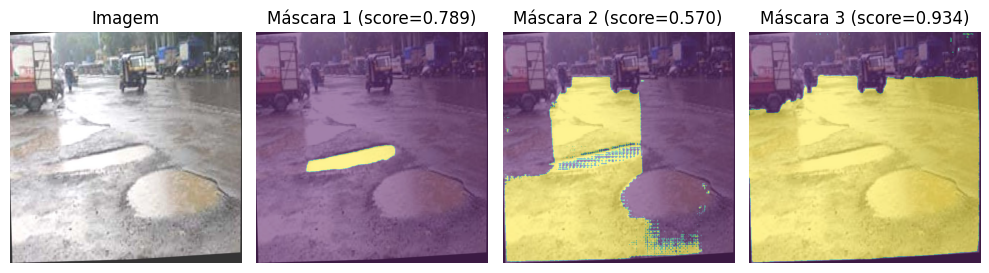

In [60]:
predictor = SamPredictor(sam)


# ==== CARREGAR IMAGEM ====
img_path = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/images/pic-1-_jpg.rf.49882cdb272111f43a6656b1494a4918.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

predictor.set_image(image)

h, w = image.shape[:2]
input_point = np.array([[w//2, h//2]])    # CORREÇÃO
input_label = np.array([1])               # CORREÇÃO

# ==== RODAR PREVISÃO ====
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)


# ==== MOSTRAR RESULTADOS ====
plt.figure(figsize=(10, 5))
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title("Imagem")
plt.axis("off")

for i, m in enumerate(masks):
    plt.subplot(1, 4, i + 2)
    plt.imshow(image)
    plt.imshow(m, alpha=0.5)
    plt.title(f"Máscara {i+1} (score={scores[i]:.3f})")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Fine tune

In [61]:
# --------------------------------------------------------------
# CONFIGURAÇÃO
# --------------------------------------------------------------

# AJUSTE AQUI: pastas do Kaggle
IMAGES_DIR = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/train/images"
MASKS_DIR = "//kaggle/working/masks_train"

SAM_CHECKPOINT = "/kaggle/working/sam_vit_h_4b8939.pth"
SAM_TYPE = "vit_h"

IMG_SIZE = 1024
BATCH_SIZE = 1
LR = 1e-4
EPOCHS = 1
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# --------------------------------------------------------------
# CARREGAR SAM E CONGELAR O ENCODER
# --------------------------------------------------------------

sam = sam_model_registry[SAM_TYPE](checkpoint=SAM_CHECKPOINT).to(DEVICE)
image_encoder = sam.image_encoder
mask_decoder = sam.mask_decoder   # vamos treinar apenas esse

# congelar image encoder
for p in image_encoder.parameters():
    p.requires_grad = False

# --------------------------------------------------------------
# DATASET
# --------------------------------------------------------------

class SAMDataset(Dataset):
    def __init__(self, img_dir, mask_dir, size=IMG_SIZE):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.size = size

        self.images = sorted([
            f for f in os.listdir(img_dir)
            if f.lower().endswith((".jpg", ".png"))
        ])

        self.tf = T.ToTensor()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        name = self.images[idx]

        img_path = os.path.join(self.img_dir, name)
        mask_path = os.path.join(self.mask_dir, name.replace(".jpg","").replace(".png","") + "_mask.png")

        img = cv2.imread(img_path)[:,:,::-1]
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        img = cv2.resize(img, (self.size, self.size))
        mask = cv2.resize(mask, (self.size, self.size), interpolation=cv2.INTER_NEAREST)

        img = self.tf(img)
        mask = torch.from_numpy((mask > 127).astype(np.float32)).unsqueeze(0)

        return img, mask

dataset = SAMDataset(IMAGES_DIR, MASKS_DIR)
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# --------------------------------------------------------------
# NORMALIZAÇÃO DO SAM
# --------------------------------------------------------------

mean = torch.tensor([123.675,116.28,103.53]).view(3,1,1).to(DEVICE) / 255.0
std  = torch.tensor([58.395,57.12,57.375]).view(3,1,1).to(DEVICE) / 255.0

# --------------------------------------------------------------
# FUNÇÕES DE LOSS E MÉTRICAS
# --------------------------------------------------------------

bce = nn.BCEWithLogitsLoss()

def dice_loss(logits, target):
    p = torch.sigmoid(logits)
    inter = (p * target).sum()
    union = p.sum() + target.sum()
    return 1 - (2 * inter + 1e-6) / (union + 1e-6)

# --------------------------------------------------------------
# OTIMIZADOR (apenas mask decoder)
# --------------------------------------------------------------

optimizer = torch.optim.Adam([
    p for p in mask_decoder.parameters() if p.requires_grad
], lr=LR)

# --------------------------------------------------------------
# TREINO
# --------------------------------------------------------------

for epoch in range(EPOCHS):
    mask_decoder.train()
    total_loss = 0

    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}")

    for imgs, masks in pbar:
        imgs = imgs.to(DEVICE)
        masks = masks.to(DEVICE)

        imgs_norm = (imgs - mean) / std

        # obter embeddings do SAM
        with torch.no_grad():
            emb = image_encoder(imgs_norm)  

        B, _, H, W = imgs_norm.shape

        # ponto dummy
        coords = torch.tensor([[[W // 2, H // 2]]], device=DEVICE).float()
        labels = torch.tensor([[1]], device=DEVICE)  # ponto positivo
        
        points = (coords, labels)   # <- formato correto

        sparse_embeddings, dense_embeddings = sam.prompt_encoder(
            points=points,
            boxes=None,
            masks=None
        )

        # passar embeddings no decoder interno do SAM
        low_res_masks, _ = mask_decoder(
            image_embeddings=emb,
            image_pe=sam.prompt_encoder.get_dense_pe(),
            sparse_prompt_embeddings=sparse_embeddings,
            dense_prompt_embeddings=dense_embeddings,
            multimask_output=False
        )

        # upsample p/ resolução da máscara
        pred = torch.nn.functional.interpolate(
            low_res_masks, 
            size=(IMG_SIZE, IMG_SIZE), 
            mode="bilinear", 
            align_corners=False
        )

        loss = bce(pred, masks) + dice_loss(pred, masks)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pbar.set_postfix(loss=total_loss/(pbar.n+1))

print("Treino finalizado.")

# --------------------------------------------------------------
# SALVAR MODELO
# --------------------------------------------------------------

os.makedirs("sam_finetuned", exist_ok=True)
torch.save(mask_decoder.state_dict(), "sam_finetuned/mask_decoder_finetuned.pth")

print("Modelo salvo em: sam_finetuned/mask_decoder_finetuned.pth")


Epoch 1/1: 100%|██████████| 720/720 [13:39<00:00,  1.14s/it, loss=0.895]

Treino finalizado.
Modelo salvo em: sam_finetuned/mask_decoder_finetuned.pth


## Segmentação Automática com AutomaticMaskGenerator (SAM)
Usamos o AutomaticMaskGenerator para segmentar todos os objetos da imagem automaticamente, sem necessidade de pontos ou bounding boxes.


In [10]:
from segment_anything import SamAutomaticMaskGenerator


In [11]:
# Criando o gerador automático de máscaras
mask_generator = SamAutomaticMaskGenerator(sam)


In [12]:
# Gerar todas as máscaras da imagem automaticamente
masks = mask_generator.generate(image)
print(f"Número de máscaras encontradas: {len(masks)}")


Número de máscaras encontradas: 36


In [13]:
import numpy as np
import matplotlib.pyplot as plt

def show_anns(anns):
    if len(anns) == 0:
        return
    
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], 
                   sorted_anns[0]['segmentation'].shape[1], 3))
    for ann in sorted_anns:
        m = ann['segmentation']
        color = np.random.random(3)
        img[m] = color

    ax.imshow(img)


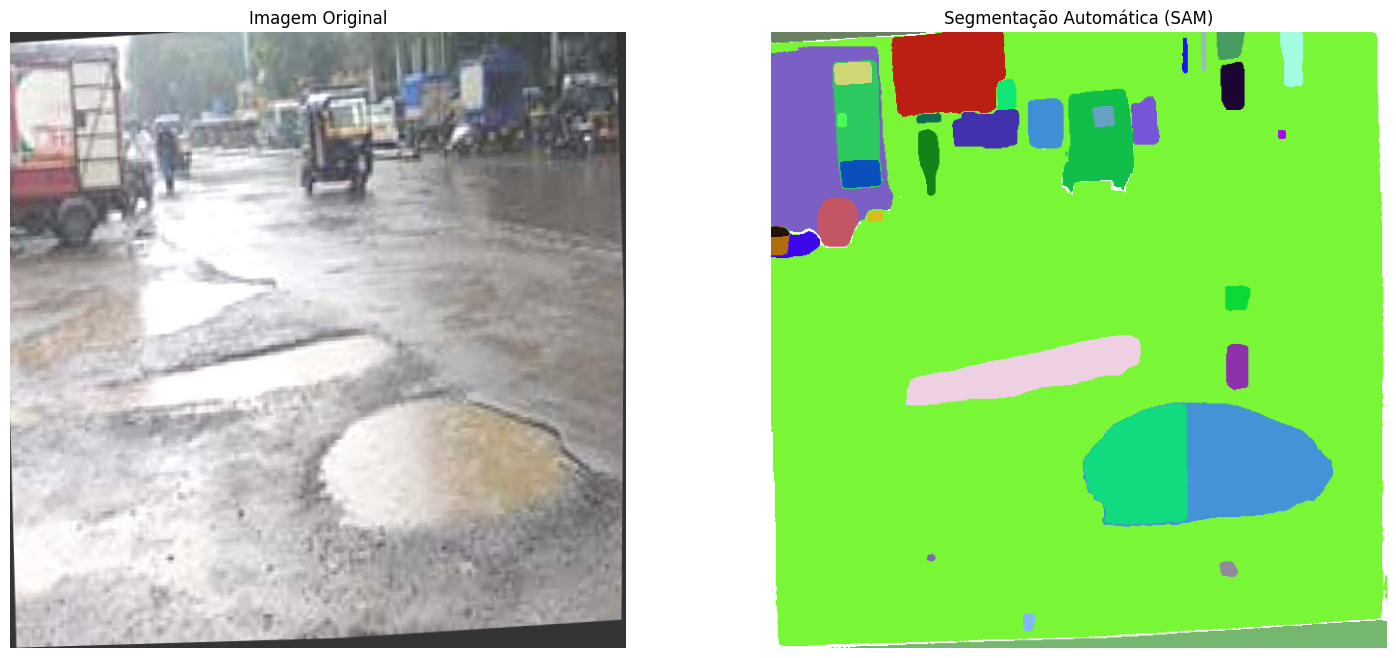

In [15]:
plt.figure(figsize=(18, 8))

#  Imagem original 
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagem Original")
plt.axis("off")

#  Máscaras automáticas 
plt.subplot(1, 2, 2)
plt.imshow(image)
show_anns(masks)
plt.title("Segmentação Automática (SAM)")
plt.axis("off")

plt.show()


## Segmentação Interativa com Pontos Iterativos (SAM)
Realizamos segmentação iterativa: adicionamos pontos positivos/negativos em sequência e o SAM atualiza a máscara a cada interação. Isso demonstra o poder interativo do modelo.


In [16]:
predictor = SamPredictor(sam)
predictor.set_image(image)


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de pontos positivos e negativos
point_coords = []
point_labels = []   # 1 = positivo, 0 = negativo

def plot_iteration(image, masks, points, labels, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # plot pontos
    for (x, y), label in zip(points, labels):
        color = 'green' if label == 1 else 'red'
        plt.scatter(x, y, color=color, s=150, edgecolors='white')
    
    # plot máscara
    if masks is not None:
        plt.imshow(masks[0], alpha=0.6)
    
    plt.title(title)
    plt.axis("off")
    plt.show()


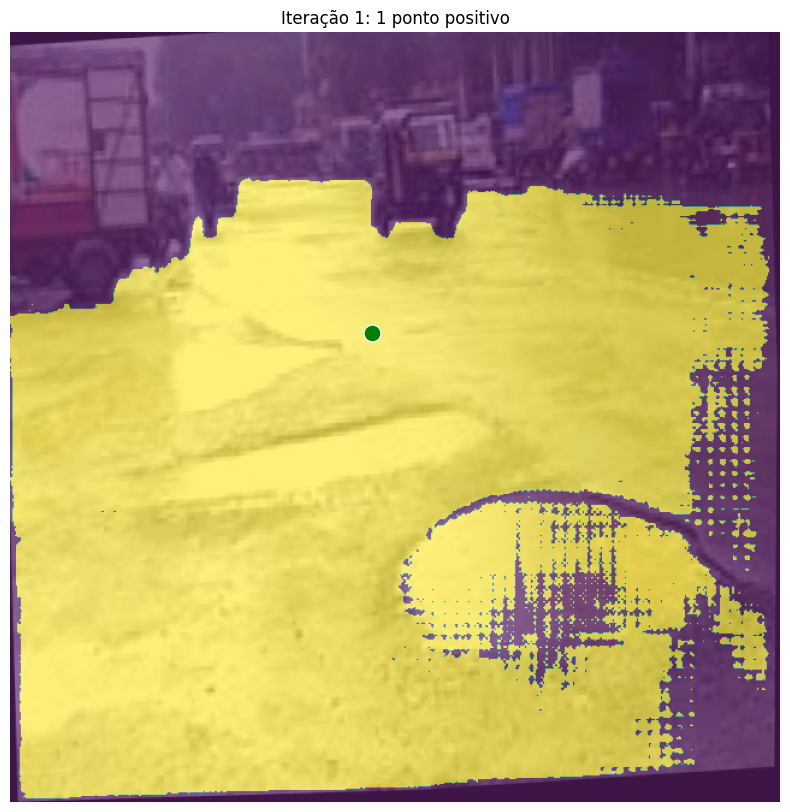

In [18]:
# Exemplo: adicionar um ponto positivo
new_point = np.array([300, 250])   # altere para onde quiser
point_label = 1  # positivo

point_coords.append(new_point)
point_labels.append(point_label)

masks, scores, logits = predictor.predict(
    point_coords=np.array(point_coords),
    point_labels=np.array(point_labels),
    multimask_output=False
)

plot_iteration(image, masks, point_coords, point_labels, "Iteração 1: 1 ponto positivo")


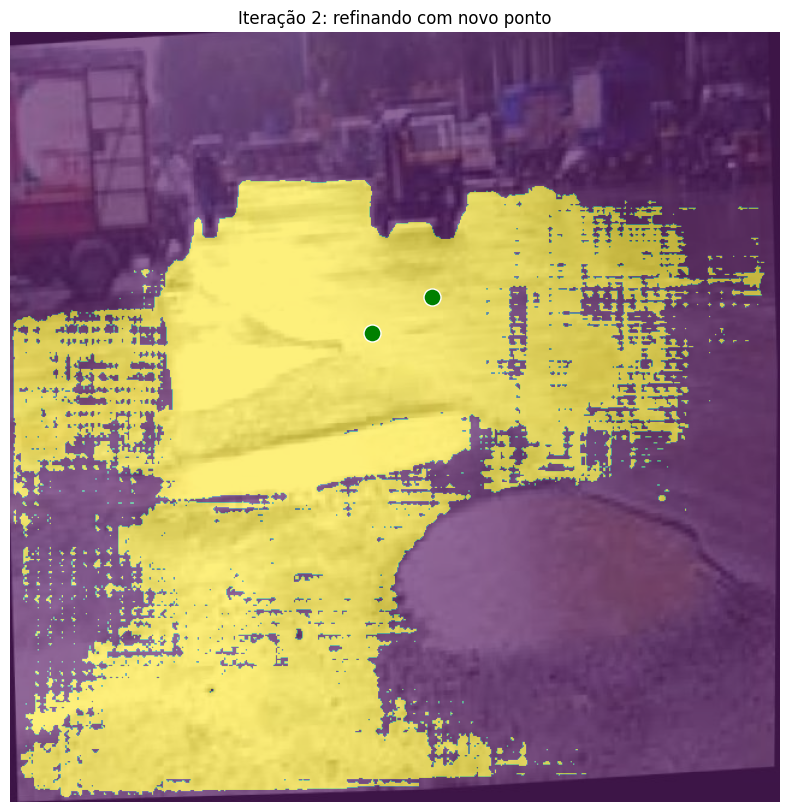

In [19]:
# Outro ponto positivo ou negativo
new_point = np.array([350, 220])
point_label = 1  # pode trocar para 0 (negativo)

point_coords.append(new_point)
point_labels.append(point_label)

masks, scores, logits = predictor.predict(
    point_coords=np.array(point_coords),
    point_labels=np.array(point_labels),
    multimask_output=False
)

plot_iteration(image, masks, point_coords, point_labels, "Iteração 2: refinando com novo ponto")


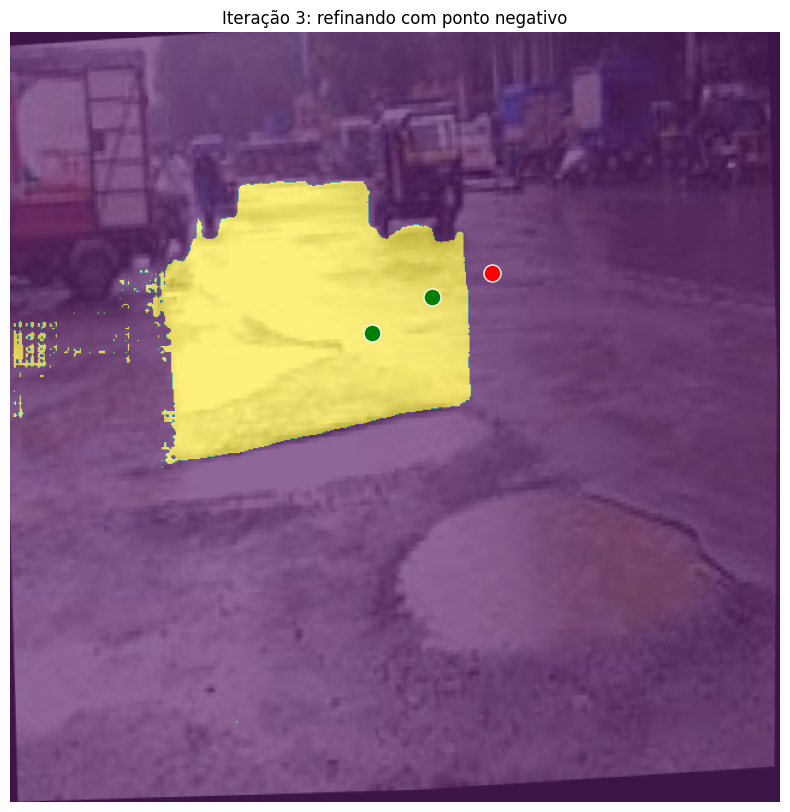

In [20]:
new_point = np.array([400, 200])
point_label = 0  # negativo

point_coords.append(new_point)
point_labels.append(point_label)

masks, scores, logits = predictor.predict(
    point_coords=np.array(point_coords),
    point_labels=np.array(point_labels),
    multimask_output=False
)

plot_iteration(image, masks, point_coords, point_labels, "Iteração 3: refinando com ponto negativo")


## Comparação entre os modelos SAM: ViT-B, ViT-L e ViT-H

Comparamos desempenho e qualidade entre os três checkpoints do SAM:
- ViT-B: menor, mais rápido
- ViT-L: intermediário
- ViT-H: maior, mais preciso

Usamos o mesmo prompt para os três modelos e exibimos as máscaras lado a lado.


In [21]:
import time
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt


In [28]:
import urllib.request
import os

# Links oficiais da Meta AI para os pesos do SAM
checkpoint_urls = {
    "ViT-B": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth",
    "ViT-L": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth",
    "ViT-H": "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
}

# Garantir que a pasta exista
os.makedirs("checkpoints", exist_ok=True)

# Baixar arquivos se não existirem
for name, url in checkpoint_urls.items():
    local_path = f"checkpoints/{os.path.basename(url)}"
    if not os.path.exists(local_path):
        print(f" Baixando {name}...")
        urllib.request.urlretrieve(url, local_path)
    else:
        print(f" {name} já existe.")

print(" Todos os checkpoints prontos!")


 Baixando ViT-B...
 Baixando ViT-L...
 Baixando ViT-H...
 Todos os checkpoints prontos!


In [29]:
# Caminhos para os pesos de cada versão do SAM
ckpts = {
    "ViT-B": "checkpoints/sam_vit_b_01ec64.pth",
    "ViT-L": "checkpoints/sam_vit_l_0b3195.pth",
    "ViT-H": "checkpoints/sam_vit_h_4b8939.pth"
}



Função que carrega, roda o prompt e mede tempo

Escolhemos se queremos comparar por ponto ou bounding box.
O exemplo é a comparação por ponto, pois é mais simples e universal.

In [25]:
def evaluate_sam_checkpoint(name, ckpt_path, image, point):
    print(f"\n Avaliando {name}...")
    
    # Carregar modelo
    sam = sam_model_registry[name.lower().replace("-", "_")](checkpoint=ckpt_path)
    predictor = SamPredictor(sam)
    predictor.set_image(image)

    # Tempo de inferência
    start = time.time()

    masks, scores, logits = predictor.predict(
        point_coords=np.array([point]),
        point_labels=np.array([1]),
        multimask_output=False
    )

    elapsed = time.time() - start
    
    return masks[0], elapsed


In [30]:
test_point = np.array([300, 300])  # ajuste conforme a imagem

results = {}
for name, ckpt in ckpts.items():
    mask, t = evaluate_sam_checkpoint(name, ckpt, image, test_point)
    results[name] = (mask, t)



 Avaliando ViT-B...

 Avaliando ViT-L...

 Avaliando ViT-H...


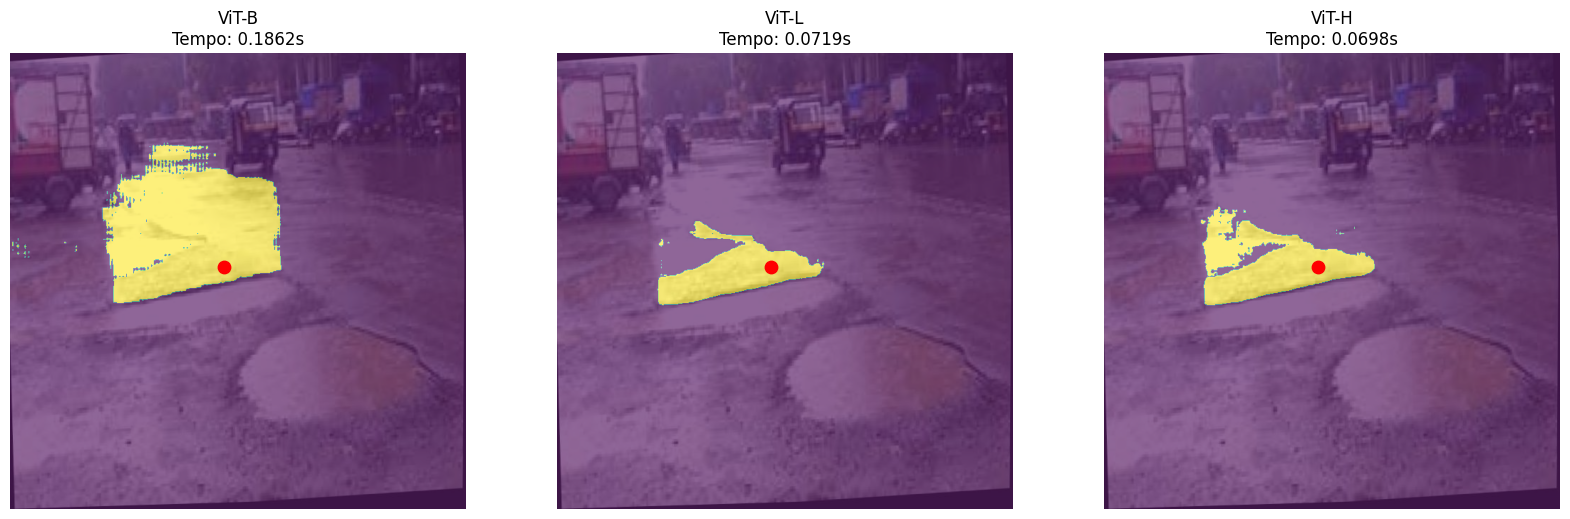


 Desempenho comparado:
ViT-B: 0.1862 segundos
ViT-L: 0.0719 segundos
ViT-H: 0.0698 segundos


In [31]:
plt.figure(figsize=(20, 6))

for i, (name, (mask, time_elapsed)) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.6)
    plt.scatter([test_point[0]], [test_point[1]], color='red', s=80)
    plt.title(f"{name}\nTempo: {time_elapsed:.4f}s")
    plt.axis("off")

plt.show()

print("\n Desempenho comparado:")
for name, (_, t) in results.items():
    print(f"{name}: {t:.4f} segundos")


## Seção: Segmentação por Texto com OWL-ViT + SAM (Grounded-SAM alternativo)
Nesta seção usamos **OWL-ViT** (detector orientado por texto) para gerar bounding boxes a partir de um prompt textual e em seguida usamos **SAM** para gerar máscaras de alta qualidade a partir dessas caixas.


In [ ]:
import os
os._exit(0)


In [1]:
!pip install --force-reinstall "protobuf<5"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 4.25.8 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatibl

In [2]:
!pip uninstall -y tensorflow tensorflow-intel keras


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0


In [3]:
!pip install "transformers[torch]" "timm" "einops"


In [4]:
!pip install "matplotlib<3.9"
!pip install "scikit-learn==1.3.2"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 86.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, which is not 

In [2]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
!pip install "numpy<2"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32

In [4]:
!pip install "transformers[torch]" timm einops
!pip install opencv-python scikit-image


  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
datase

In [2]:
from transformers import OwlViTProcessor, OwlViTForObjectDetection

print("OWL-ViT importado com sucesso!")


2025-11-23 18:02:32.300521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763920952.484935      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763920952.537601      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


OWL-ViT importado com sucesso!


In [67]:
# Caminho do notebook (para referência / não necessário alterar)
notebook_path = "/mnt/data/SAM.ipynb"

# Tentar importar OWL-ViT do transformers; se não existir, instalar sem forçar upgrades pesados
try:
    from transformers import OwlViTProcessor, OwlViTForObjectDetection
    print("transformers com OWL-ViT já disponível.")
except Exception as e:
    print("OWL-ViT não encontrado — instalando dependências necessárias (pode levar alguns minutos)...", e)
    # Instalar transformers leve (tentar versão moderna compatível). Se o ambiente for sensível a upgrades
    # esse pip pode ser comentado/ajustado conforme necessário. Tentar instalar sem forçar numpy/torch upgrades.
    !pip install -q "transformers>=4.30.0" timm einops
    from transformers import OwlViTProcessor, OwlViTForObjectDetection
    print("Instalação concluída.")

# imports padrão
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Função utilitária para garantir tensor no device correto
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)


transformers com OWL-ViT já disponível.
Device: cuda


In [68]:
def detect_text_boxes_owlvit(image_np, text_prompt, score_threshold=0.3, max_results=10):
    """
    image_np: numpy array RGB HxW x3 ou PIL.Image
    text_prompt: string
    retorna: list de dicts {box: [x1,y1,x2,y2], score: float, label: str}
    """
    # aceitar numpy ou PIL
    if isinstance(image_np, np.ndarray):
        pil_image = Image.fromarray(image_np.astype(np.uint8))
    else:
        pil_image = image_np

    processor = OwlViTProcessor.from_pretrained("google/owlvit-base-patch32")  # peso do processor (baixado automaticamente)
    model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32").to(device)

    # processor = OwlViTProcessor.from_pretrained("google/owlvit-large-patch14")
    # model = OwlViTForObjectDetection.from_pretrained("google/owlvit-large-patch14").to("cuda" if torch.cuda.is_available() else "cpu")


    # preparação
    inputs = processor(text=[text_prompt], images=pil_image, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    # post-process para boxes em pixels
    target_sizes = torch.tensor([pil_image.size[::-1]], device=outputs.logits.device)  # (H, W)
    results = processor.post_process_object_detection(outputs, threshold=score_threshold, target_sizes=target_sizes)

    detections = []
    if len(results) > 0:
        r = results[0]
        boxes = r["boxes"].cpu().numpy()  # xmin,ymin,xmax,ymax (pixels)
        scores = r["scores"].cpu().numpy()
        labels = r.get("labels")
        # labels podem ser inteiros (mapeamento interno) — OWL-ViT usa texto do prompt, então você pode usar prompt
        for i, (b, s) in enumerate(zip(boxes, scores)):
            if len(detections) >= max_results:
                break
            detections.append({"box": b.tolist(), "score": float(s), "label": text_prompt})
    return detections


In [69]:
# Tenta reusar variáveis já existentes (sam ou predictor) do notebook
try:
    predictor  # noqa: F821
    print("Usando predictor SAM já carregado no notebook.")
except NameError:
    # tenta carregar o SAM a partir de checkpoints locais (pasta 'checkpoints/')
    print("Nenhum predictor SAM encontrado — vamos tentar carregar um modelo ViT-B por padrão.")
    from segment_anything import sam_model_registry, SamPredictor
    ckpt_path = "checkpoints/sam_vit_b_01ec64.pth"
    if not os.path.exists(ckpt_path):
        print(f"Checkpoint {ckpt_path} não encontrado. Se quiser, baixe os checkpoints oficiais da Meta e coloque em checkpoints/.")
        # Se preferir, podemos baixar automaticamente (descomente abaixo).
        # import urllib.request
        # os.makedirs("checkpoints", exist_ok=True)
        # urllib.request.urlretrieve("https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth", ckpt_path)
    sam = sam_model_registry["vit_b"](checkpoint=ckpt_path)
    predictor = SamPredictor(sam)
    print("SAM ViT-B carregado e predictor inicializado.")


Usando predictor SAM já carregado no notebook.


In [44]:
def owlvit_to_sam_and_plot(image_np, text_prompt, score_threshold=0.3, show_top_k=5):
    """
    image_np: numpy RGB HxW x3
    text_prompt: string
    """
    # 1) detectar caixas com OWL-ViT
    detections = detect_text_boxes_owlvit(image_np, text_prompt, score_threshold=score_threshold, max_results=show_top_k)
    print(f"Detecções encontradas: {len(detections)} (prompt='{text_prompt}')")
    for d in detections:
        print(f"  score={d['score']:.3f} box={d['box']}")

    # 2) configurar predictor (reusar ou set_image)
    predictor.set_image(image_np)

    masks_list = []
    for d in detections:
        b = d["box"]
        # OWL-ViT boxes são [xmin,ymin,xmax,ymax]
        box_np = np.array([b], dtype=float)  # predictor aceita array 1x4
        masks, scores, logits = predictor.predict(box=box_np[0], multimask_output=False)
        masks_list.append({"mask": masks[0], "score": float(scores[0]), "box": b})

    # 3) plot: original | boxes | masks overlay
    H, W = image_np.shape[:2]
    plt.figure(figsize=(18, 6))

    # Original
    plt.subplot(1, 3, 1)
    plt.imshow(image_np)
    plt.title("Imagem Original")
    plt.axis("off")

    # Boxes
    plt.subplot(1, 3, 2)
    plt.imshow(image_np)
    ax = plt.gca()
    for d in detections:
        x1, y1, x2, y2 = d["box"]
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=3, edgecolor="yellow", facecolor="none")
        ax.add_patch(rect)
        ax.text(x1, y1-8, f"{d['label']} {d['score']:.2f}", color="yellow", fontsize=12, backgroundcolor="black")
    plt.title(f"Boxes detectadas (prompt: '{text_prompt}')")
    plt.axis("off")

    # Masks overlay
    plt.subplot(1, 3, 3)
    plt.imshow(image_np)
    for m in masks_list:
        plt.imshow(m["mask"], alpha=0.45)
    plt.title("Máscaras SAM a partir das boxes")
    plt.axis("off")

    plt.show()

    return detections, masks_list


Detecções encontradas: 5 (prompt='depression on road surface')
  score=0.001 box=[-0.5025482177734375, -0.1426410675048828, 207.81996154785156, 56.41559982299805]
  score=0.001 box=[-1.014251708984375, -1.6413354873657227, 322.82904052734375, 115.67562103271484]
  score=0.001 box=[-2.5328636169433594, -1.331319808959961, 315.6640319824219, 116.57844543457031]
  score=0.001 box=[6.554269790649414, -1.3354969024658203, 318.5195617675781, 107.07274627685547]
  score=0.000 box=[105.8528060913086, 13.498123168945312, 124.36000061035156, 27.71089744567871]


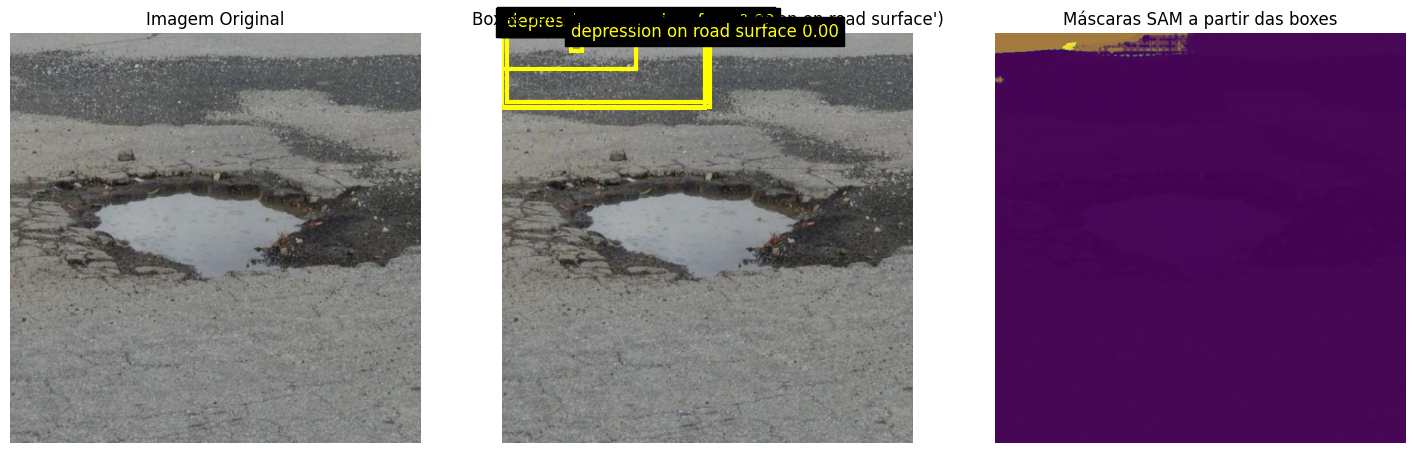

In [50]:
# Substitua pelo caminho da sua imagem no notebook
image_path = "/kaggle/input/pothole-image-segmentation-dataset/Pothole_Segmentation_YOLOv8/valid/images/pic-114-_jpg.rf.a0f30e06b3b96d7879d5f55a7012433c.jpg"   # <-- altere para sua imagem, ex: "/kaggle/working/img.jpg"

# Carregar imagem
from PIL import Image
img = Image.open(image_path).convert("RGB")
image_np = np.array(img)

# Prompt de texto
# text_prompt = "Pothole"   # experimente "cachorro", "carro", "capacete", etc.
# text_prompt = "a pothole on the street"
# text_prompt = "hole on the road"
# text_prompt = "damaged asphalt"
# text_prompt = "crack or pothole in pavement"
text_prompt = "depression on road surface"

# text_prompt = [
#     "pothole",
#     "hole on the road",
#     "damaged asphalt",
#     "asphalt depression",
#     "crack on the pavement"
# ]



# Rodar pipeline
detections, masks = owlvit_to_sam_and_plot(image_np, text_prompt, score_threshold=0.0001, show_top_k=5)


Com upscale da imagem antes de rodar o OWL-ViT, usando OpenCV ou PIL

Resolução original: (640, 640, 3)
Resolução ampliada: (1280, 1280, 3)
Detecções encontradas: 10 (prompt='pothole')
  score=0.001 box=[56.61367416381836, -0.27904510498046875, 539.4852294921875, 68.24247741699219]
  score=0.001 box=[139.29141235351562, 0.7791042327880859, 1050.3486328125, 85.25374603271484]
  score=0.001 box=[-4.249992370605469, 40.00682830810547, 728.8589477539062, 286.4567565917969]
  score=0.002 box=[4.816703796386719, 50.2259635925293, 1280.551513671875, 309.4017639160156]
  score=0.004 box=[7.486457824707031, 49.3983154296875, 1279.7235107421875, 298.81072998046875]
  score=0.001 box=[3.8833236694335938, 61.42932891845703, 1278.194580078125, 222.1868896484375]
  score=0.001 box=[799.2058715820312, 56.764862060546875, 1285.8631591796875, 256.46343994140625]
  score=0.001 box=[433.387451171875, 124.72982788085938, 678.24755859375, 261.2340087890625]
  score=0.001 box=[12.774124145507812, 38.49864959716797, 1289.8837890625, 812.530029296875]
  score=0.001 box=[711.939

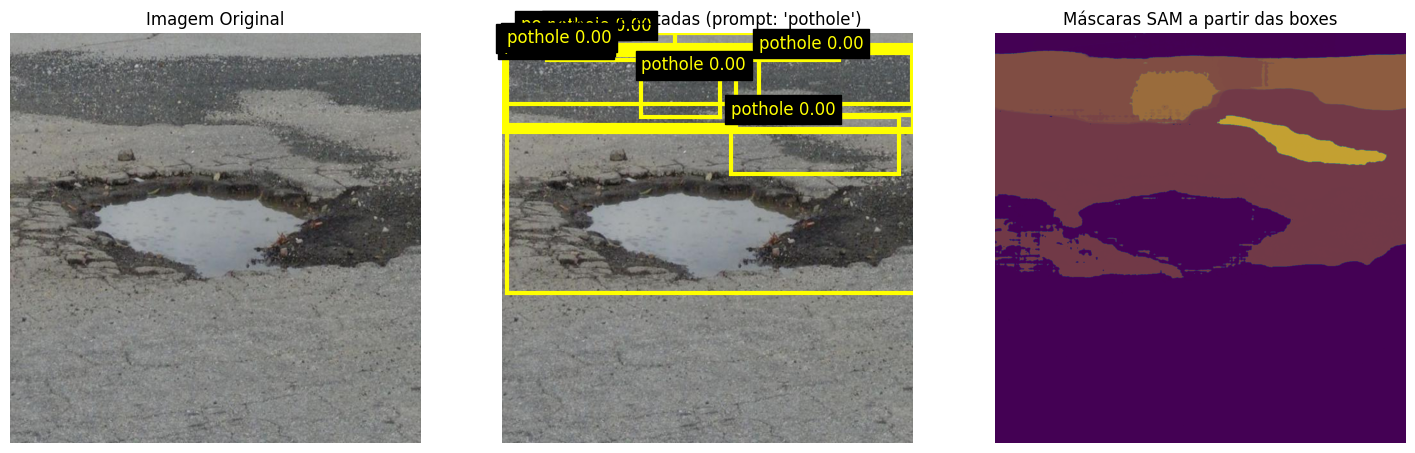

In [46]:
import cv2
import numpy as np
from PIL import Image

# Carregar imagem normalmente
img = Image.open(image_path).convert("RGB")
image_np = np.array(img)

# AUMENTAR A RESOLUÇÃO — fx = 2 → dobra o tamanho
big = cv2.resize(image_np, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

print("Resolução original:", image_np.shape)
print("Resolução ampliada:", big.shape)

# Rodar pipeline usando a imagem maior
detections, masks = owlvit_to_sam_and_plot(
    big,
    text_prompt="pothole",
    score_threshold=0.0005,
    show_top_k=10
)


Tamanho antigo: (640, 640)
Novo tamanho: (1280, 1280)
Detecções encontradas: 10 (prompt='pothole')
  score=0.001 box=[56.58546447753906, -0.29730796813964844, 538.2371215820312, 68.49530029296875]
  score=0.001 box=[78.04916381835938, 1.1665725708007812, 1126.87060546875, 85.99911499023438]
  score=0.001 box=[-4.873809814453125, 39.33002471923828, 715.9984741210938, 286.1463623046875]
  score=0.001 box=[4.530067443847656, 50.19035339355469, 1280.5009765625, 307.0711975097656]
  score=0.004 box=[6.97021484375, 49.019920349121094, 1279.426025390625, 297.80657958984375]
  score=0.001 box=[4.504890441894531, 61.822452545166016, 1278.697509765625, 218.4680938720703]
  score=0.001 box=[817.5924072265625, 56.55954360961914, 1286.01318359375, 255.62368774414062]
  score=0.001 box=[12.982292175292969, 36.66603088378906, 1290.066162109375, 812.9534301757812]
  score=0.001 box=[712.024169921875, 263.528076171875, 1236.094482421875, 438.28955078125]
  score=0.001 box=[833.7989501953125, 289.078063

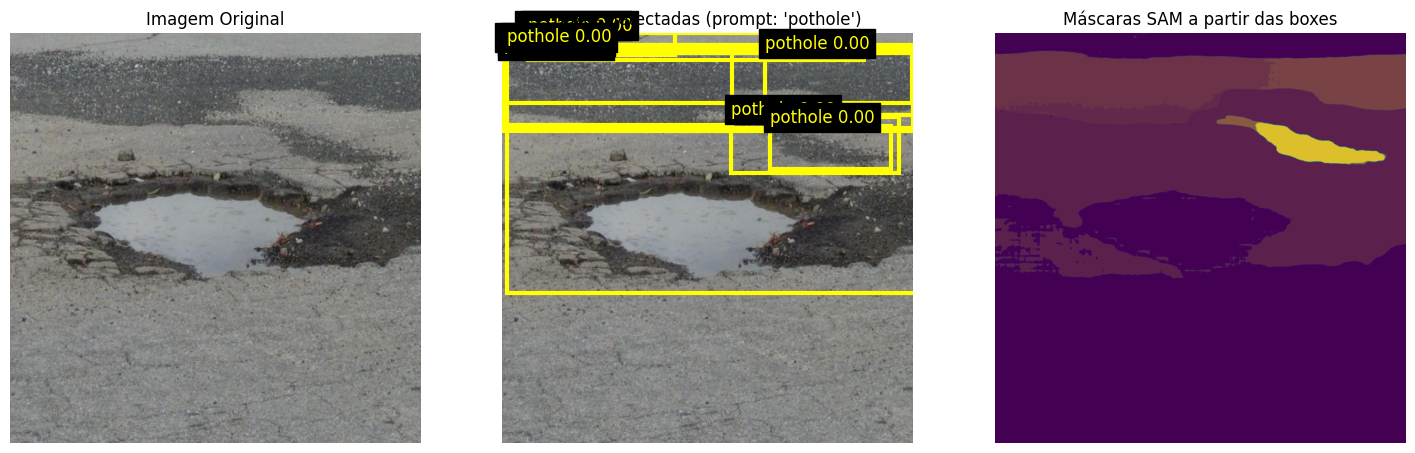

In [53]:
from PIL import Image

img = Image.open(image_path).convert("RGB")

w, h = img.size
new_w, new_h = w * 2, h * 2

big_img = img.resize((new_w, new_h), Image.LANCZOS)
big = np.array(big_img)

print("Tamanho antigo:", (w, h))
print("Novo tamanho:", (new_w, new_h))

detections, masks = owlvit_to_sam_and_plot(
    big,
    text_prompt="pothole",
    score_threshold=0.0005,
    show_top_k=10
)


Usando o SAM depois do finetuning

In [70]:
import torch
from segment_anything import sam_model_registry, SamPredictor
from transformers import OwlViTProcessor, OwlViTForObjectDetection
import cv2
import numpy as np
import matplotlib.pyplot as plt

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ------------------------------------
# 1) Carrega o SAM ORIGINAL (encoder)
# ------------------------------------
sam = sam_model_registry["vit_h"](checkpoint=SAM_CHECKPOINT).to(DEVICE)

# Congelar encoder (igual ao treino)
for p in sam.image_encoder.parameters():
    p.requires_grad = False

# ------------------------------------
# 2) Carrega o mask decoder FINETUNADO
# ------------------------------------
state = torch.load("/kaggle/working/sam_finetuned/mask_decoder_finetuned.pth", map_location=DEVICE)
sam.mask_decoder.load_state_dict(state)

predictor = SamPredictor(sam)

print("SAM finetunado carregado com sucesso!")

# ------------------------------------
# 3) Carregar OWL-ViT Large
# ------------------------------------
processor = OwlViTProcessor.from_pretrained("google/owlvit-large-patch14")
owlvit = OwlViTForObjectDetection.from_pretrained("google/owlvit-large-patch14").to(DEVICE)

print("OWL-ViT Large carregado!")


SAM finetunado carregado com sucesso!
OWL-ViT Large carregado!


In [71]:
def detect_with_owlvit(image_bgr, text_query="pothole"):
    image_rgb = image_bgr[:, :, ::-1]

    inputs = processor(
        text=[text_query],
        images=image_rgb,
        return_tensors="pt"
    ).to(DEVICE)

    with torch.no_grad():
        outputs = owlvit(**inputs)

    results = processor.post_process_object_detection(
        outputs=outputs,
        threshold=0.12,
        target_sizes=[image_rgb.shape[:2]]
    )[0]

    return results


In [77]:
def sam_finetuned_inference_with_box(image_bgr, box):

    predictor.set_image(image_bgr)

    # OWL-ViT → GPU Tensor  → CPU numpy (SAM requer numpy)
    box = box.detach().cpu().numpy().reshape(1, 4)

    masks, scores, logits = predictor.predict(
        box=box,
        multimask_output=False
    )

    return masks[0]


In [78]:
def owlvit_to_sam_pipeline(image_path, text_prompt="pothole"):
    # carregar imagem
    image_bgr = cv2.imread(image_path)

    # 1) detectar caixas com OWL-ViT
    results = detect_with_owlvit(image_bgr, text_prompt)

    boxes = results["boxes"]
    scores = results["scores"]

    final_mask = np.zeros(image_bgr.shape[:2], dtype=np.float32)

    # 2) rodar SAM finetunado para cada caixa
    for score, box in zip(scores, boxes):
        mask = sam_finetuned_inference_with_box(image_bgr, box)
        final_mask = np.maximum(final_mask, mask.astype(np.float32))

    return image_bgr, final_mask, boxes, scores


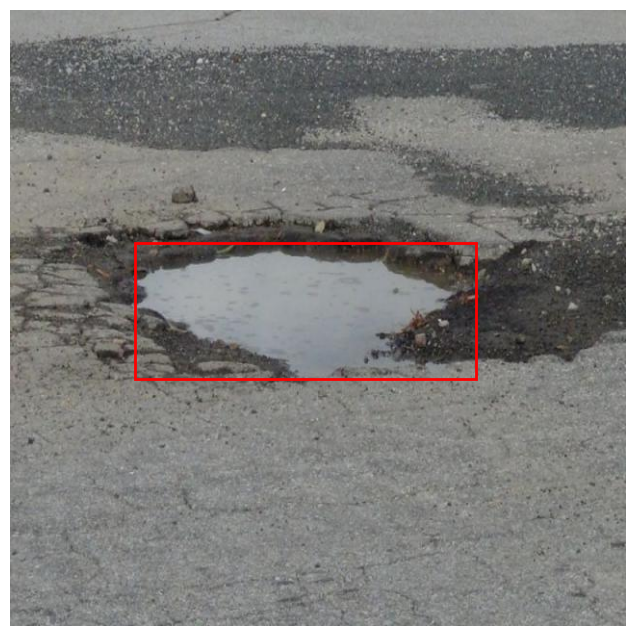

In [80]:
plt.figure(figsize=(8,8))
plt.imshow(image[:,:,::-1])
ax = plt.gca()

# Converter boxes OWL-ViT → numpy CPU
boxes = [b.detach().cpu().numpy().tolist() for b in boxes]

for box in boxes:
    x0, y0, x1, y1 = box
    rect = plt.Rectangle(
        (x0, y0),
        (x1 - x0),
        (y1 - y0),
        fill=False,
        edgecolor="red",
        linewidth=2
    )
    ax.add_patch(rect)

plt.axis("off")
plt.show()


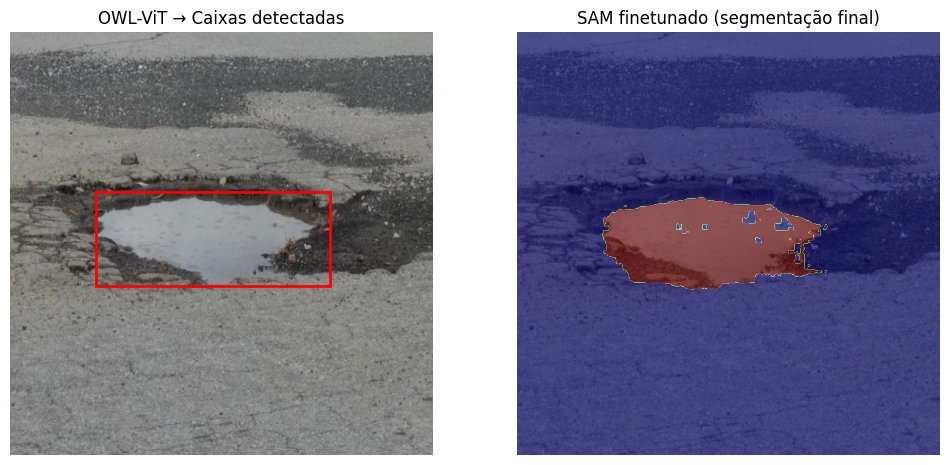

In [82]:
# --- Convertendo boxes para CPU+numpy ---
boxes = [box.detach().cpu().numpy().tolist() for box in boxes]

# --- Convertendo máscara SAM (torch) para numpy ---
if isinstance(mask, torch.Tensor):
    mask = mask.detach().cpu().numpy()

# Se for máscara 2D dentro de um canal [1,H,W]
if mask.ndim == 3 and mask.shape[0] == 1:
    mask = mask[0]

# -------------------------------------------------------
# PLOT FINAL
# -------------------------------------------------------

plt.figure(figsize=(12,6))

# ---- LEFT: caixas detectadas pelo OWL-ViT ----
plt.subplot(1,2,1)
plt.title("OWL-ViT → Caixas detectadas")
plt.imshow(image[:,:,::-1])
ax = plt.gca()

for box in boxes:
    x0, y0, x1, y1 = box
    rect = plt.Rectangle((x0, y0), (x1 - x0), (y1 - y0),
                         fill=False, edgecolor="red", linewidth=2)
    ax.add_patch(rect)

plt.axis("off")

# ---- RIGHT: máscara final do SAM ----
plt.subplot(1,2,2)
plt.title("SAM finetunado (segmentação final)")
plt.imshow(image[:,:,::-1])
plt.imshow(mask, alpha=0.5, cmap="jet")
plt.axis("off")

plt.show()
